<u><h1 style="font-family:geneva;font-size:42px;"> <center> Machine Learning Based Loan Default Prediction</center> </h1><u/>

***

<p style= "background-color:aliceblue; font-family:cambria; font-size:18px">The goal of this project is to build a machine learning model that can predict if a person will default on the loan based on the loan and personal information provided. The model is intended to be used as a reference tool by the financial institution to help make decisions on issuing loans, so that the risk can be lowered, and the profit can be maximized</p>

## <b style='color:sandybrown;font-size:32px'>Contents</b>
1. **[Importing Libraries](#libs)**
2. **[Reading the Dataset](#reads)**
3. **[Exploratory Data Analysis](#eda)**
    - 3.1 - **[Shape and Feature Datatypes](#shade)**
    - 3.2 - **[Basic Features Overview](#over)**
    - 3.3 - **[Five Number Summary](#sum)**
    - 3.4 - **[Missing Value Visualization](#ms)**
    - 3.5 - **[Distribution of Numerical Variables](#nums)**
    - 3.6 - **[Distribution of Categorical Variables](#cats)**
4. **[Data Preprocessing](#prep)**
    - 4.1 - **[Missing Value Treatment](#mvt)**
    - 4.2 - **[Outlier Treatment](#ot)**
5. **[Feature Scaling, Encoding and Engineering](#feat)**
    - 5.1 - **[Class Imbalance](#smote)**
6. **[Model Building](#models)**
7. **[Final Solution](#sol)**

<a id="libs"></a>
<hr><b><h1 style='background-color:bisque;color:black; font-size:40px; font-family:cambria;text-align:center;'> Importing all the Required Libraries</h1></b><hr/>

In [366]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, QuantileTransformer, RobustScaler,LabelEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report,confusion_matrix,f1_score, accuracy_score

from xgboost import XGBClassifier

plt.style.use('seaborn-whitegrid')
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
sns.set_palette('Paired')

from IPython.core.display import HTML, display

from imblearn.over_sampling import SMOTE
import missingno as ms

<a id="reads"></a>
<hr><b><h1 style='background-color:bisque;color:black; font-size:40px; font-family:cambria;text-align:center;'> Reading the Train and Test data</h1></b><hr/>

In [367]:
train_data = pd.read_csv('Train_Set_TVS.csv')
df = train_data.copy()
df.head(3)

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,540071,801850.0,Y,658040.0,13816.52,0.0304,IT,ndf,Morethan_One,NaN,Metro,1,Grad,Married,F,1_to_3,0.9,Not_Specified,SAT,Yes,CLoan,3.0,2.0,East,46.0,10.0,Yes,No,0.077,0.077,18.0,2.0,1.0
1,511643,884222.0,N,198075.0,11173.06,0.0194,IT,ndf,Morethan_One,1.0,Metro,2,Grad,Married,M,1_to_3,3.0,Not_Specified,wed,Yes,CLoan,3.0,1.0,North,46.0,12.0,Yes,Yes,0.184,0.184,306.0,4.0,0.0
2,506688,284120.0,N,101056.0,8390.40,0.0118,Govt.,ndf,One,4.0,Metro,3,Other,Married,M,1_to_3,NaN,Not_Specified,mon,Yes,CLoan,2.0,3.0,North,57.0,5.0,Yes,Yes,0.538,0.538,281.0,4.0,0.0


In [368]:
test_data = pd.read_csv('Test_Set_TVS.csv')
xtest = test_data.copy()
xtest.head(3)

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought
0,487410,653106.0,Y,809400.00,9145.51,0.0015,Govt.,ndf,Morethan_One,1.0,Metro,1,Grad,Married,M,1_to_3,5.4,Not_Specified,thur,Yes,CLoan,3.0,2.0,North,39.0,11.0,Yes,Yes,0.349,0.349,3133.0,2.0
1,533258,434150.0,N,72618.75,7683.23,0.0332,Govt.,ndf,One,4.0,Metro,1,Grad,Married,M,1_to_3,2.3,Y,wed,No,CLoan,2.0,3.0,Central,46.0,13.0,Yes,Yes,0.237,0.237,1730.0,5.0
2,581926,489060.0,N,267255.80,9032.85,0.0316,IT,ndf,Morethan_One,NaN,Rural,1,Grad,Married,M,1_to_3,11.0,Y,thur,No,CLoan,3.0,2.0,South,33.0,15.0,Yes,Yes,0.111,0.111,759.0,4.0


<a id="eda"></a>
<hr><b><h1 style='background-color:bisque;color:black; font-size:40px; font-family:cambria;text-align:center;'> EDA on the Train Data</h1></b><hr/>

<a id="shade"></a>
<h1 style="background-color:cornflowerblue; color:black; font-family:cambria;text-align:center;" >Shape and Feature Datatypes in the Data</h1><hr>

In [369]:
rows = df.shape[0]
columns = df.shape[1]
print(f'\033[1m No. of Rows in Train Data - {rows}')
print(f'\033[1m No. of Columns in Train Data - {columns}')

 No. of Rows in Train Data - 132440
 No. of Columns in Train Data - 33


In [370]:
df = df.astype({'Default':'object'})
df.drop('ID',axis=1,inplace=True)

In [371]:
xtest.drop('ID',axis=1,inplace=True)

In [372]:
cat = df.select_dtypes(include='object').columns
num = df.select_dtypes(exclude='object').columns
print(f'\033[1m The Categorical Features in the Train Data - {len(cat)} \n\n {list(cat)}')
print('\n')
print(f'\033[1m The Numerical Features in the Train Data - {len(num)} \n\n {list(cat)}')

 The Categorical Features in the Train Data - 18 

 ['Vehicle_Status', 'Job_Type', 'Default_hist', 'Prop_List', 'Region_Type', 'Credit_Inq', 'Education_det', 'Marital_Stat', 'Gen', 'Credit_Lnks', 'Income_Alt', 'Day_Process', 'Ph.No', 'Type_Loan', 'Region', 'Addr_permanent', 'Permanent_Addr_tag', 'Default']


 The Numerical Features in the Train Data - 14 

 ['Vehicle_Status', 'Job_Type', 'Default_hist', 'Prop_List', 'Region_Type', 'Credit_Inq', 'Education_det', 'Marital_Stat', 'Gen', 'Credit_Lnks', 'Income_Alt', 'Day_Process', 'Ph.No', 'Type_Loan', 'Region', 'Addr_permanent', 'Permanent_Addr_tag', 'Default']


<a id="over"></a>
<h1 style="background-color:cornflowerblue; color:black; font-family:cambria;text-align:center;" >Basic Overview of Each Feature</h1><hr>

In [373]:
pd.DataFrame({'Unique Values':df.nunique(),'Nulls':df.isna().sum(),'% of Nulls':df.isna().sum()/len(df)*100,
             'Datatype':df.dtypes})

,Unique Values,Nulls,% of Nulls,Datatype
Compensation,84095,6242,4.713078,float64
Vehicle_Status,2,9104,6.874056,object
Loan_amt,119260,0,0.000000,float64
Annuity_amt,117192,4611,3.481577,float64
density_Ind,417,5416,4.089399,float64
Job_Type,3,10248,7.737844,object
Default_hist,2,0,0.000000,object
Prop_List,3,1965,1.483691,object
Home_Appliances,13,10964,8.278466,float64
Region_Type,3,0,0.000000,object


<a id="sum"></a>
<h1 style="background-color:cornflowerblue; color:black; font-family:cambria;text-align:center;" >Five Number Summary</h1><hr>

In [374]:
df.describe()

,Compensation,Loan_amt,Annuity_amt,density_Ind,Home_Appliances,Experience,Dependents,Company_Rating,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought
count,1.261980e+05,1.324400e+05,127829.000000,127024.000000,121476.000000,110595.000000,132440.000000,120709.000000,132440.00000,132440.000000,114927.000000,119119.000000,124287.000000,132440.000000
mean,7.450519e+05,4.148011e+05,10845.286442,0.020446,3.220891,6.580616,2.155467,2.030553,43.93326,12.060865,0.505929,0.506181,979.451383,3.387738
std,4.702762e+05,2.746788e+05,2061.529355,0.015077,1.241751,6.357054,0.909046,0.503750,11.96270,3.566714,0.268665,0.268716,829.632194,2.173246
min,1.527280e+05,3.427500e+04,5852.100000,0.000100,1.000000,0.000000,1.000000,1.000000,21.00000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,5.177060e+05,2.045300e+05,9348.370000,0.010400,2.000000,2.100000,2.000000,2.000000,34.00000,10.000000,0.268000,0.268000,288.000000,2.000000
50%,6.659960e+05,3.495425e+05,10773.820000,0.020400,4.000000,4.600000,2.000000,2.000000,43.00000,12.000000,0.500000,0.500000,770.000000,3.000000
75%,8.794890e+05,5.582050e+05,12165.390000,0.030400,4.000000,9.000000,3.000000,2.000000,54.00000,15.000000,0.769000,0.769000,1589.000000,5.000000
max,7.037702e+07,2.872142e+06,41301.000000,2.017800,19.000000,48.100000,9.000000,3.000000,69.00000,25.000000,0.947000,0.947000,4309.000000,25.000000


<a id="ms"></a>
<h1 style="background-color:cornflowerblue; color:black; font-family:cambria;text-align:center;" >Features with missing values</h1><hr>

In [375]:
print(f'\033[1mThe Features containing Missing values \n\n',np.array([ i for i in df.columns if df[i].isna().sum()>0]).flatten())

The Features containing Missing values 

 ['Compensation' 'Vehicle_Status' 'Annuity_amt' 'density_Ind' 'Job_Type'
 'Prop_List' 'Home_Appliances' 'Credit_Inq' 'Experience' 'Income_Alt'
 'Company_Rating' 'c1_rated' 'c2_rated' 'Contact_age']


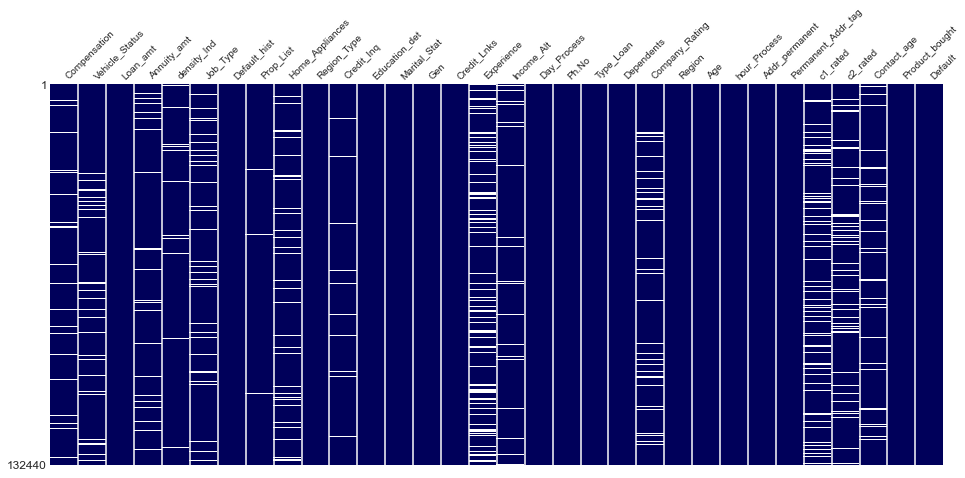

In [376]:
ms.matrix(df,figsize=(16,7),sparkline=False,fontsize=10,color=(0,0,0.355),p=100)
plt.show()

<a id="nums"></a>
<h1 style="background-color:cornflowerblue; color:black; font-family:cambria;text-align:center;" >Distribution of Numerical Variables</h1><hr>

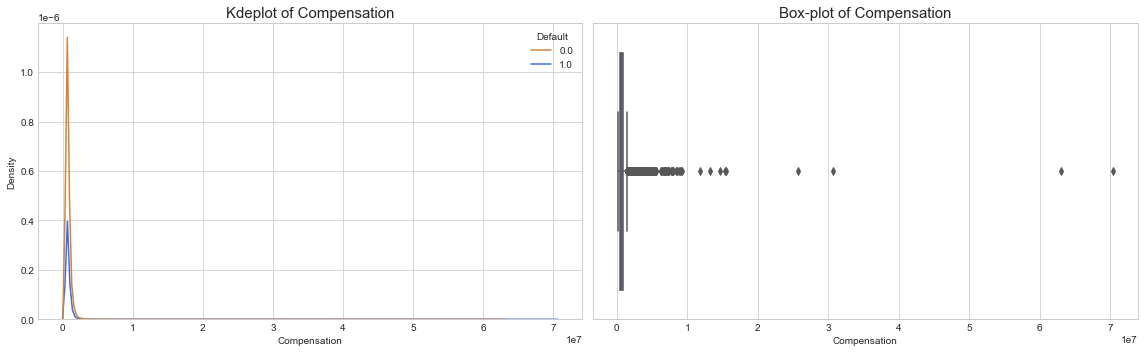

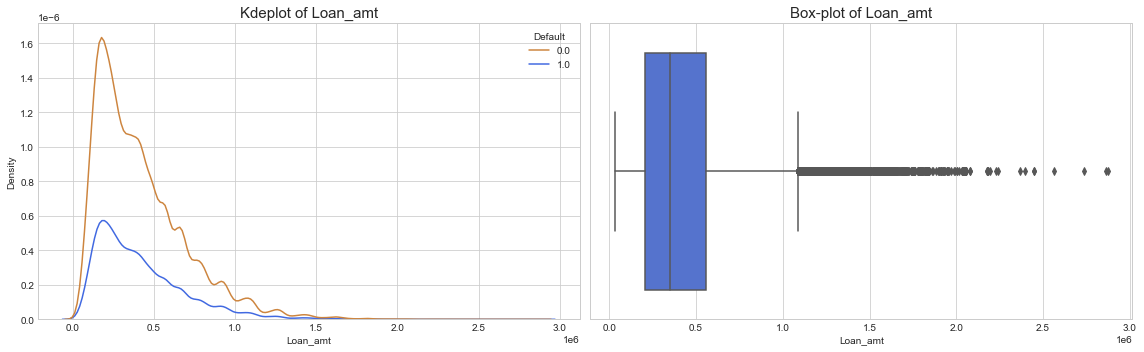

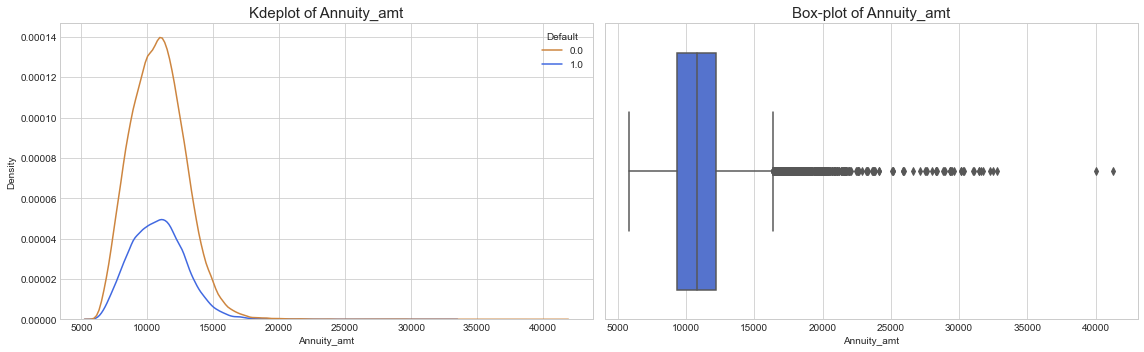

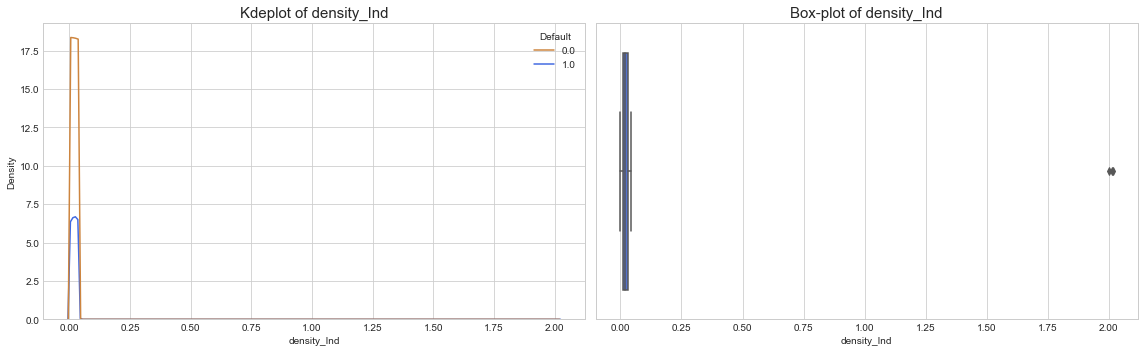

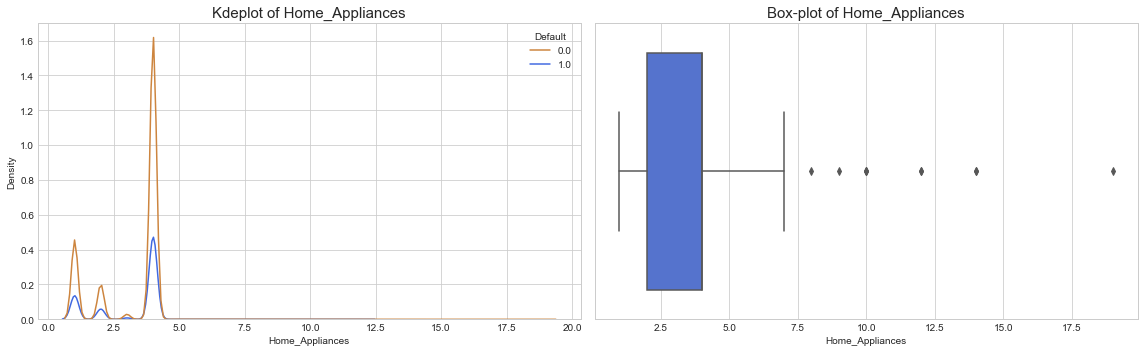

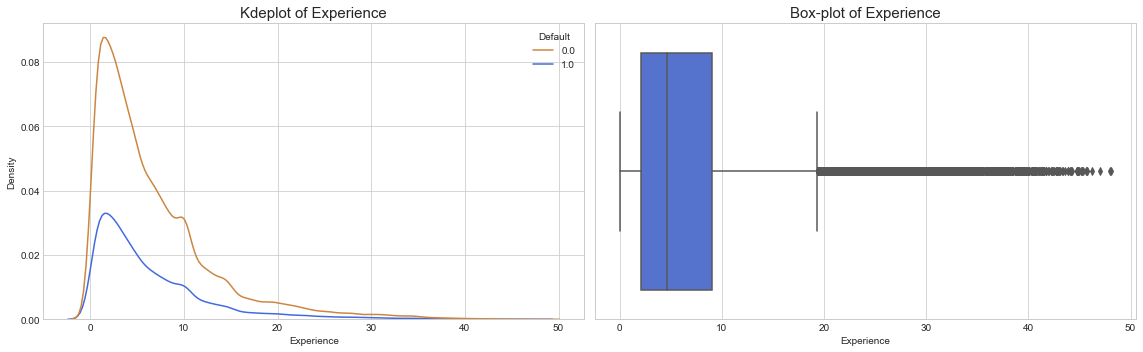

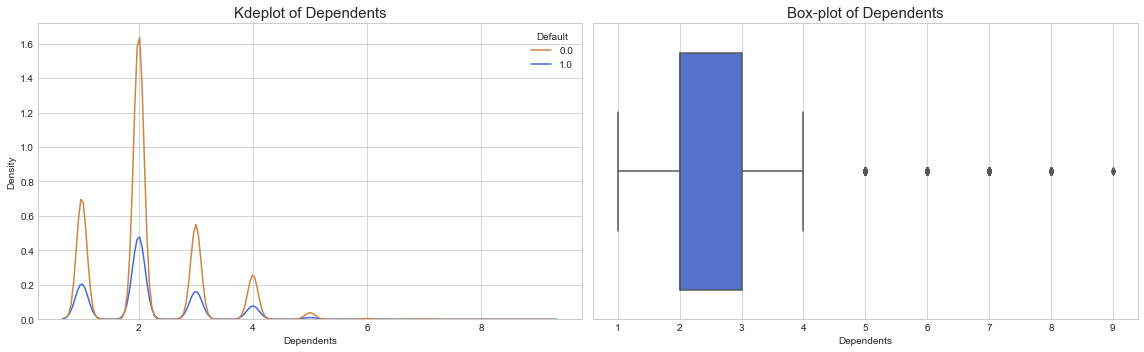

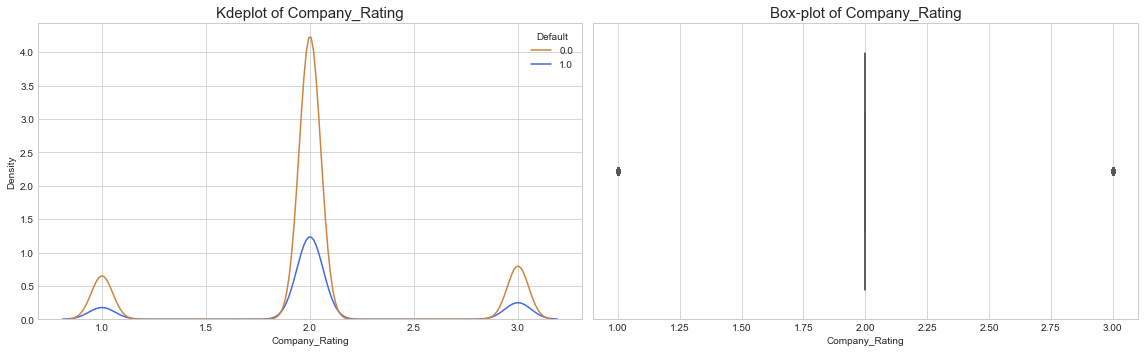

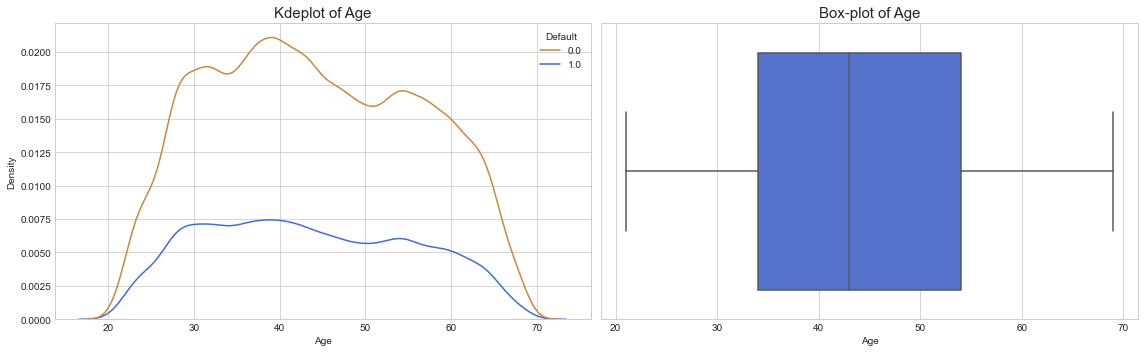

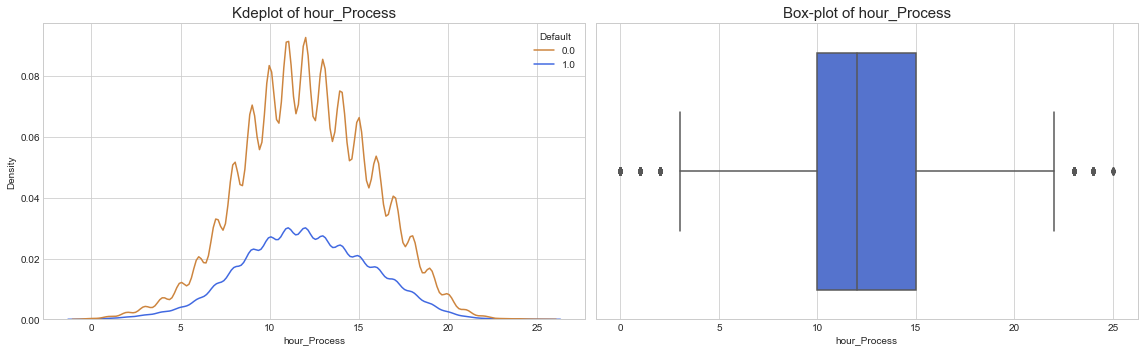

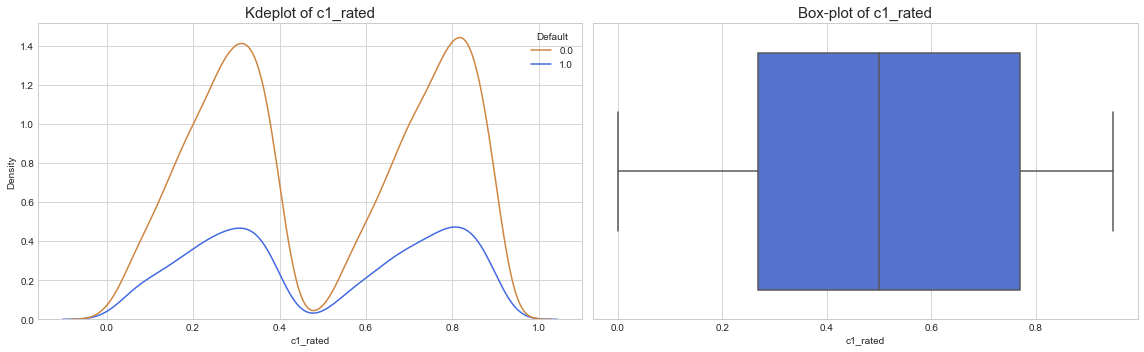

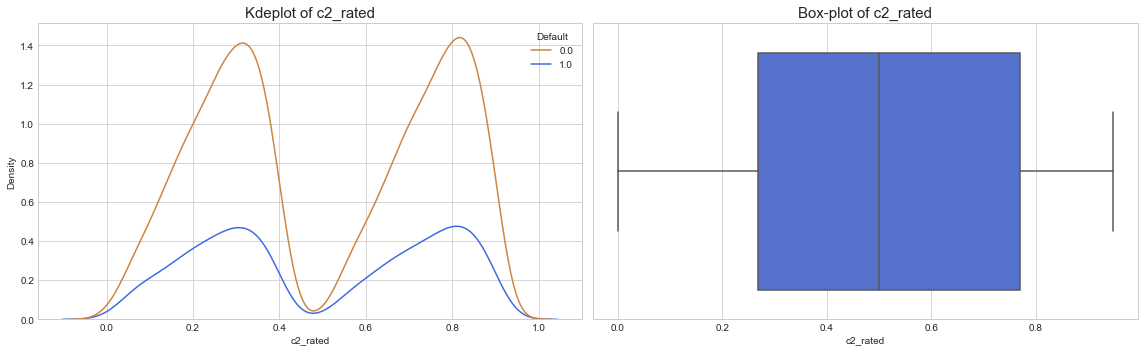

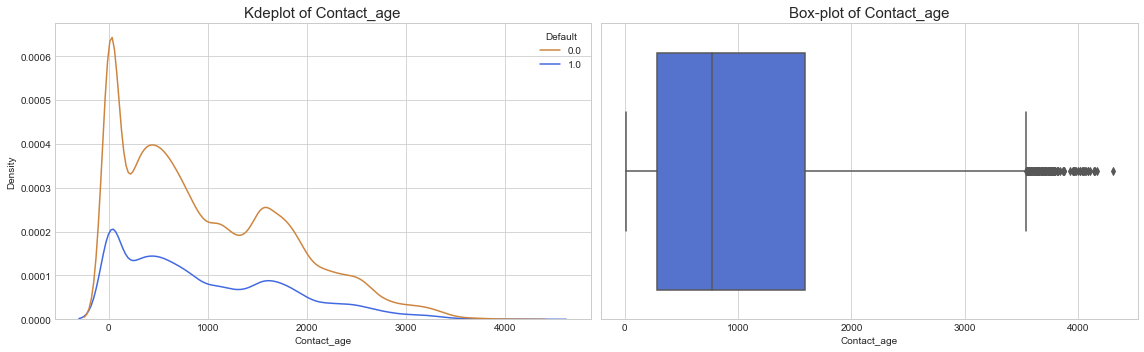

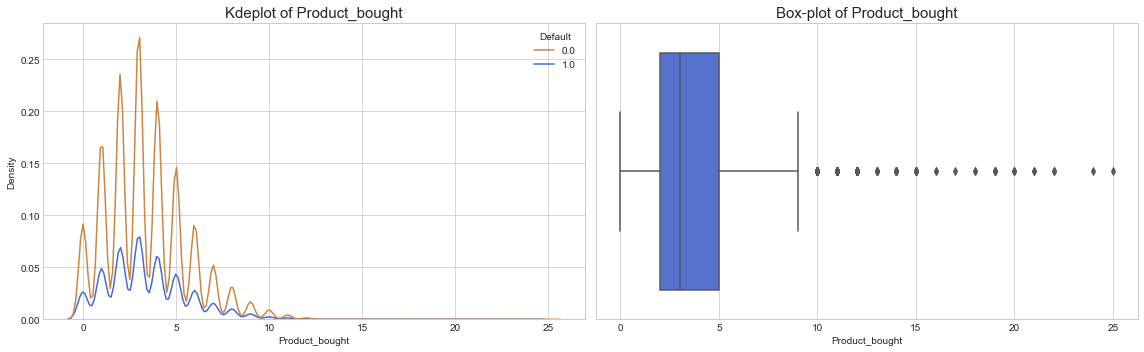

In [377]:
numerical_cols = list(num)
for i,col in enumerate(numerical_cols):
    text="<center><h3><b  style='color:black;font-size:20px;'>" + f"Distribution of</b> <b style='color:steelblue;font-size:20px;'> {col}"+ "</b></h3></hr></center>"
    display(HTML(text))
    plt.figure(figsize=(16,5))
    
    plt.subplot(1,2,1)
    sns.kdeplot(data=df,x=col,hue='Default',palette=['peru','royalblue'])
    plt.title(f'Kdeplot of {col}',size=15)
    
    plt.subplot(1,2,2)
    sns.boxplot(data=df,x=col,color='royalblue')
    plt.title(f'Box-plot of {col}',size=15)
    plt.tight_layout()
    plt.show()

<h3> <b style='color:royalblue;font-size:20px;'>Inference</b>:
    <ul>
  <li><b style='font-size:14px;'>The distribution of Numerical variables are same for both the Target Classes</b></li><br>
  <li><b style='font-size:14px;'>Majority of the Variables are extremely right skewed</b></li><br>
  <li><b style='font-size:14px;'>Density_Ind has an outlier which may be a wrong data entered</b></li><br>
  <li><b style='font-size:14px;'>Credit Rating can be treated as a Categorical variable</b></li><br>
    </ul>
</h3>

<a id="cats"></a>
<h1 style="background-color:cornflowerblue; color:black; font-family:cambria;text-align:center;" >Distribution of Categorical Variables</h1><hr>

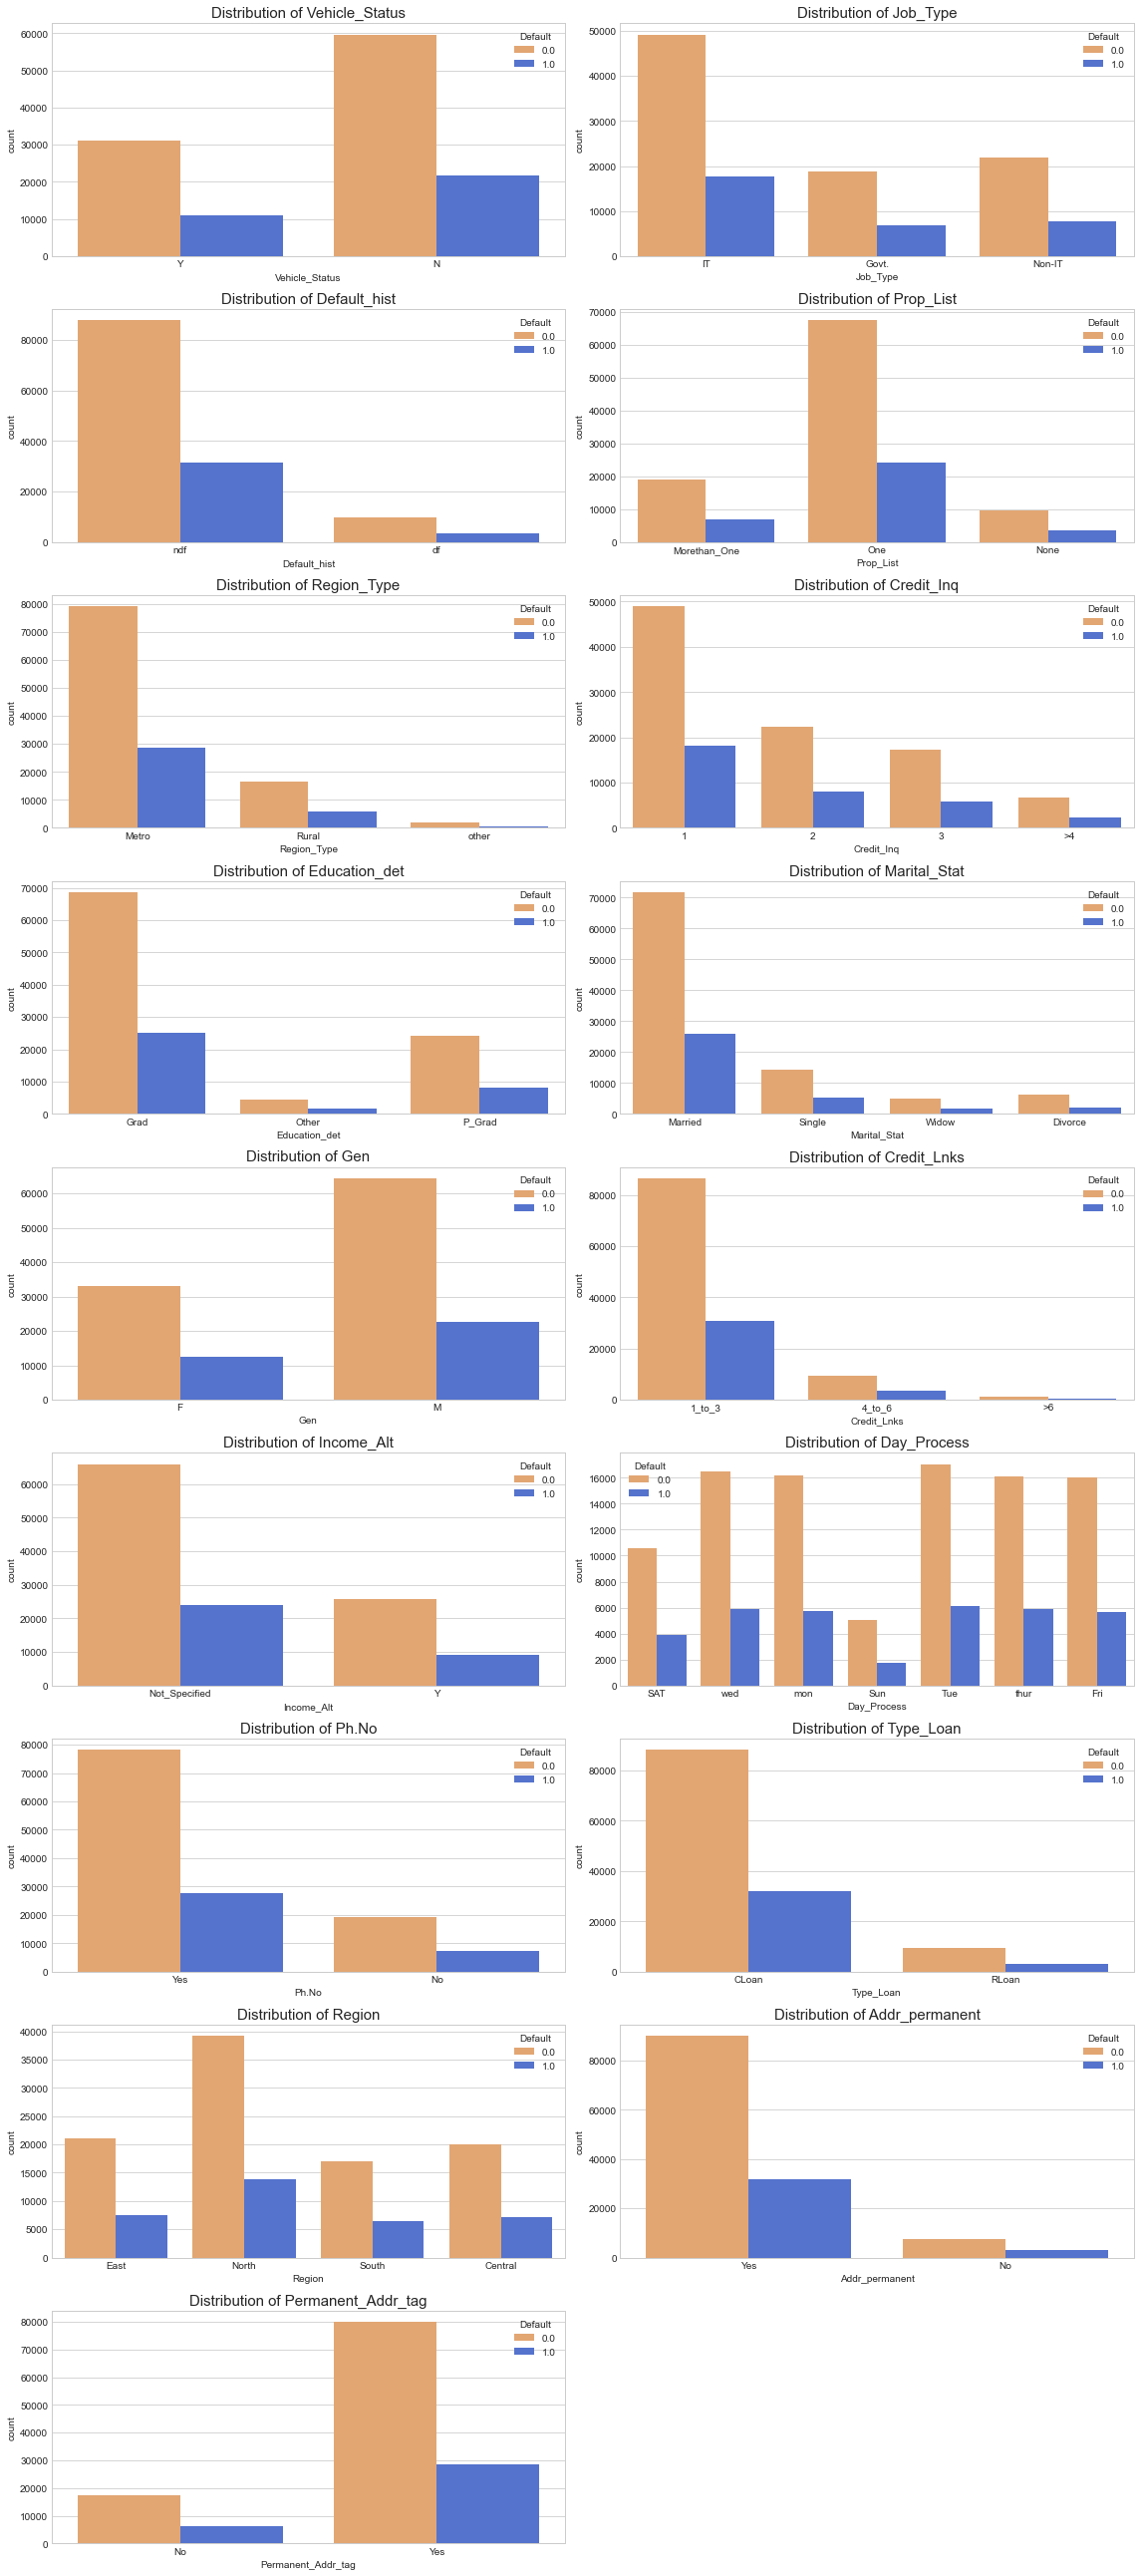

In [378]:
categorical_cols = list(cat)
plt.figure(figsize=(16,36))
for i,col in enumerate(categorical_cols[:-1]):
    plt.subplot(9,2,i+1)
    sns.countplot(data=df, x=col,hue='Default',palette=['sandybrown','royalblue'])
    plt.title(f'Distribution of {col}',size=15)
plt.tight_layout()    
plt.show()

<h3> <b style='color:royalblue;font-size:20px;'>Inference</b>:
    <ul>
  <li><b style='font-size:14px;'>Similar to Numerical variables, the Categorical variables' Distribution also remains the same for both the Target Classes</b></li><br>
    </ul>
</h3>

<a id="prep"></a>
<hr><b><h1 style='background-color:bisque;color:black; font-size:40px; font-family:cambria;text-align:center;'> Data Preprocessing</h1></b><hr/>

<a id="mvt"></a>
<h1 style="background-color:cornflowerblue; color:black; font-family:cambria;text-align:center;" >Missing Value Treatment</h1><hr>

In [379]:
df.isna().sum()[df.isna().sum()>0]

Compensation        6242
Vehicle_Status      9104
Annuity_amt         4611
density_Ind         5416
Job_Type           10248
Prop_List           1965
Home_Appliances    10964
Credit_Inq          2690
Experience         21845
Income_Alt          7682
Company_Rating     11731
c1_rated           17513
c2_rated           13321
Contact_age         8153
dtype: int64

<h3> <b style='color:royalblue;font-size:20px;'>Techniques Used </b>:
    <ul>
  <li><b style='font-size:14px;'>Extreme Skewness - Filled with Median (Outliers Dont Impact Median)</b></li><br>
  <li><b style='font-size:14px;'>Normal Data - Filled with Mean (As Mean and Median will be same)</b></li><br>
  <li><b style='font-size:14px;'>Categorical Feature - Proportional Imputation (The Distribution Remains unchanged)</b></li><br>
    </ul>
</h3>

In [380]:
# Filling Compensation Feature with Median as it is extremely right skewed
df['Compensation'] = df['Compensation'].fillna(df.Compensation.median())


# Filling Vehicle_Status with Proportion of Classes
vs = df.Vehicle_Status.value_counts(normalize=True)
df['Vehicle_Status'] = df['Vehicle_Status'].fillna(pd.Series(np.random.choice(list(vs.index),p=list(vs.values),size=len(df))))


# Filling Annuity_amt with Median because of skewness
df['Annuity_amt'] = df['Annuity_amt'].fillna(df['Annuity_amt'].median())


# There is a huge gap between the outliers and good value. Hence replacing the outliers with division by 100
# Filling with Mean, since after replacement, the data has become Normal
df['density_Ind'] = df['density_Ind'].replace(list(df[df.density_Ind>1].loc[:,'density_Ind'].values),[0.02,0.02,0.02])
df['density_Ind'] = df['density_Ind'].fillna(df.density_Ind.mean())


# Filling Job_Type with proportion of classes
jt = df.Job_Type.value_counts(normalize=True)
df['Job_Type'] = df['Job_Type'].fillna(pd.Series(np.random.choice(list(jt.index),p=list(jt.values),size=len(df))))


# Filling Prop_List with Proportion of Classes
pl = df.Prop_List.value_counts(normalize=True)
df['Prop_List'] = df['Prop_List'].fillna(pd.Series(np.random.choice(list(pl.index),p=list(pl.values),size=len(df))))


# Filling Home_Appliances with Floored Mean
df['Home_Appliances'] = df['Home_Appliances'].fillna(np.floor(df['Home_Appliances'].mean()))


# Filling Credit_Inq with Proportion of Classes
ci = df.Credit_Inq.value_counts(normalize=True)
df['Credit_Inq'] = df['Credit_Inq'].fillna(pd.Series(np.random.choice(list(ci.index),p=list(ci.values),size=len(df))))


# Filling Experience with Proportion of Values which are less than or equal to 10
ex = df[df['Experience']<=10].loc[:,'Experience'].value_counts(normalize=True)
df['Experience'] = df['Experience'].fillna(pd.Series(np.random.choice(list(ex.index),p=list(ex.values),size=len(df))))


# Fill Income_Alt with proportion of classes
ia = df.Income_Alt.value_counts(normalize=True)
df['Income_Alt'] = df['Income_Alt'].fillna(pd.Series(np.random.choice(list(ia.index),p=list(ia.values),size=len(df))))


# Filling Company_Rating with Proportion of Classes and Changing the Datatype
cr = df.Company_Rating.value_counts(normalize=True)
df['Company_Rating'] = df['Company_Rating'].fillna(pd.Series(np.random.choice(list(cr.index),p=list(cr.values),size=len(df))))
df['Company_Rating'] = df['Company_Rating'].astype('int').astype('object')


# Filling c1_rated and c2_rated with Mean (Normalized Data)
df['c1_rated'] = df['c1_rated'].fillna(df['c1_rated'].mean())
df['c2_rated'] = df['c2_rated'].fillna(df['c2_rated'].mean())


# Filling Contact_age with Median
df['Contact_age'] = df['Contact_age'].fillna(df['Contact_age'].median())

In [381]:
# Filling Compensation Feature with Median as it is extremely right skewed
xtest['Compensation'] = xtest['Compensation'].fillna(xtest.Compensation.median())


# Filling Vehicle_Status with Proportion of Classes
vs = xtest.Vehicle_Status.value_counts(normalize=True)
xtest['Vehicle_Status'] = xtest['Vehicle_Status'].fillna(pd.Series(np.random.choice(list(vs.index),p=list(vs.values),size=len(xtest))))


# Filling Annuity_amt with Median because of skewness
xtest['Annuity_amt'] = xtest['Annuity_amt'].fillna(xtest['Annuity_amt'].median())


# There is a huge gap between the outliers and good value. Hence replacing the outliers with division by 100
# Filling with Mean, since after replacement, the data has become Normal
xtest['density_Ind'] = xtest['density_Ind'].replace(list(xtest[xtest.density_Ind>1].loc[:,'density_Ind'].values),[0.02,0.02])
xtest['density_Ind'] = xtest['density_Ind'].fillna(xtest.density_Ind.mean())


# Filling Job_Type with proportion of classes
jt = xtest.Job_Type.value_counts(normalize=True)
xtest['Job_Type'] = xtest['Job_Type'].fillna(pd.Series(np.random.choice(list(jt.index),p=list(jt.values),size=len(xtest))))


# Filling Prop_List with Proportion of Classes
pl = xtest.Prop_List.value_counts(normalize=True)
xtest['Prop_List'] = xtest['Prop_List'].fillna(pd.Series(np.random.choice(list(pl.index),p=list(pl.values),size=len(xtest))))


# Filling Home_Appliances with Floored Mean
xtest['Home_Appliances'] = xtest['Home_Appliances'].fillna(np.floor(xtest['Home_Appliances'].mean()))


# Filling Credit_Inq with Proportion of Classes
ci = xtest.Credit_Inq.value_counts(normalize=True)
xtest['Credit_Inq'] = xtest['Credit_Inq'].fillna(pd.Series(np.random.choice(list(ci.index),p=list(ci.values),size=len(xtest))))


# Filling Experience with Proportion of Values which are less than or equal to 10
ex = xtest[xtest['Experience']<=10].loc[:,'Experience'].value_counts(normalize=True)
xtest['Experience'] = xtest['Experience'].fillna(pd.Series(np.random.choice(list(ex.index),p=list(ex.values),size=len(xtest))))


# Fill Income_Alt with proportion of classes
ia = xtest.Income_Alt.value_counts(normalize=True)
xtest['Income_Alt'] = xtest['Income_Alt'].fillna(pd.Series(np.random.choice(list(ia.index),p=list(ia.values),size=len(xtest))))


# Filling Company_Rating with Proportion of Classes and Changing the Datatype
cr = xtest.Company_Rating.value_counts(normalize=True)
xtest['Company_Rating'] = xtest['Company_Rating'].fillna(pd.Series(np.random.choice(list(cr.index),p=list(cr.values),size=len(xtest))))
xtest['Company_Rating'] = xtest['Company_Rating'].astype('int').astype('object')


# Filling c1_rated and c2_rated with Mean (Normalized Data)
xtest['c1_rated'] = xtest['c1_rated'].fillna(xtest['c1_rated'].mean())
xtest['c2_rated'] = xtest['c2_rated'].fillna(xtest['c2_rated'].mean())


# Filling Contact_age with Median
xtest['Contact_age'] = xtest['Contact_age'].fillna(xtest['Contact_age'].median())

In [382]:
print([i for i in df.columns if df[i].isna().sum()>0])
print([i for i in xtest.columns if xtest[i].isna().sum()>0])

[]
[]


<a id="ot"></a>
<h1 style="background-color:cornflowerblue; color:black; font-family:cambria;text-align:center;" >Outlier Treatment</h1><hr>

In [383]:
df.select_dtypes(include=np.number).skew()[np.abs(df.select_dtypes(include=np.number).skew())>0.3]

Compensation       51.249445
Loan_amt            1.375253
Annuity_amt         0.688440
Home_Appliances    -0.995110
Experience          2.106093
Dependents          0.886568
Contact_age         0.780406
Product_bought      0.798961
dtype: float64

<h3> <b style='color:royalblue;font-size:20px;'>Approach Taken </b>:
    <ul>
     <li><b style='font-size:14px;'> Since the values showing as Outliers are Necessary for the model building, We can't remove them</b></li><br>
     <li><b style='font-size:14px;'> Hence we Have to transform those variables with Outliers</b></li><br>
     <li><b style='font-size:14px;'> Mix of Power-Transformer (YEO-JOHNSON Method) and Log-Transformation used</b></li><br>
    </ul>
</h3>

In [384]:
df['Compensation'] = np.log(df[['Compensation']])
df['Annuity_amt'] = np.log(df[['Annuity_amt']])
df['Product_bought'] = PowerTransformer().fit_transform(df[['Product_bought']])
df['Loan_amt'] = PowerTransformer().fit_transform(df[['Loan_amt']])
df['Experience'] = PowerTransformer().fit_transform(df[['Experience']])
df['Dependents'] = PowerTransformer().fit_transform(df[['Dependents']])
df['Contact_age'] = PowerTransformer().fit_transform(df[['Contact_age']])
df['Home_Appliances'] = np.log(df[['Home_Appliances']])

In [385]:
xtest['Compensation'] = np.log(xtest[['Compensation']])
xtest['Annuity_amt'] = np.log(xtest[['Annuity_amt']])
xtest['Product_bought'] = PowerTransformer().fit_transform(xtest[['Product_bought']])
xtest['Loan_amt'] = PowerTransformer().fit_transform(xtest[['Loan_amt']])
xtest['Experience'] = PowerTransformer().fit_transform(xtest[['Experience']])
xtest['Dependents'] = PowerTransformer().fit_transform(xtest[['Dependents']])
xtest['Contact_age'] = PowerTransformer().fit_transform(xtest[['Contact_age']])
xtest['Home_Appliances'] = np.log(xtest[['Home_Appliances']])

<a id="feat"></a>
<hr><b><h1 style='background-color:bisque;color:black; font-size:40px; font-family:cambria;text-align:center;'> Feature Scaling, Encoding and Engineering</h1></b><hr/>

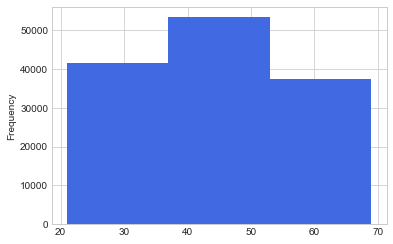

In [386]:
df.Age.plot.hist(color='royalblue',bins=3)
plt.show()

In [387]:
# Creation of New Feature Age Bucket

df['Age_bucket'] = pd.qcut(df.Age,3,labels=['Young','Middle','Old'])
xtest['Age_bucket'] = pd.qcut(xtest.Age,3,labels=['Young','Middle','Old'])

In [388]:
print(df.Age_bucket.value_counts(normalize=True))
print('\n')
print(xtest.Age_bucket.value_counts(normalize=True))

Young     0.342661
Middle    0.331667
Old       0.325672
Name: Age_bucket, dtype: float64


Young     0.343199
Middle    0.330973
Old       0.325828
Name: Age_bucket, dtype: float64


In [389]:
df.drop('Age',axis=1,inplace=True)
xtest.drop('Age',axis=1,inplace=True)

In [390]:
df = df.astype({'Age_bucket':'object'})
xtest = xtest.astype({'Age_bucket':'object'})

In [391]:
X = df.drop('Default',axis=1)
y = df['Default']

In [392]:
y

0         1.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
132435    1.0
132436    0.0
132437    0.0
132438    1.0
132439    1.0
Name: Default, Length: 132440, dtype: object

In [393]:
y = y.astype('int')

In [394]:
class_2 = [ i for i in X.columns if X[i].nunique()==2]
class_2

['Vehicle_Status',
 'Default_hist',
 'Gen',
 'Income_Alt',
 'Ph.No',
 'Type_Loan',
 'Addr_permanent',
 'Permanent_Addr_tag']

In [395]:
# Applying Label Encoder to features with 2 classes
for i in class_2:
    X[i] = LabelEncoder().fit_transform(X[i])
    xtest[i] = LabelEncoder().fit_transform(xtest[i])

In [396]:
X.select_dtypes(include='O').columns

Index(['Job_Type', 'Prop_List', 'Region_Type', 'Credit_Inq', 'Education_det',
       'Marital_Stat', 'Credit_Lnks', 'Day_Process', 'Company_Rating',
       'Region', 'Age_bucket'],
      dtype='object')

In [397]:
# Frequency Encoding the categorical variables

for i in X.select_dtypes(include='O').columns:
    X[i]= X[i].map(X[i].value_counts(normalize=True).to_dict())
    xtest[i]= xtest[i].map(xtest[i].value_counts(normalize=True).to_dict()) 

In [398]:
X.head(2)

,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Age_bucket
0,13.594677,1,1.009943,9.533620,0.0304,0.548505,1,0.198588,1.098612,0.812051,0.516709,0.708683,0.737005,0,0.887979,-1.393004,0,0.109400,1,0,0.991634,0.744828,0.216060,10.0,1,0,0.077,0.077,-1.671860,-0.553063,0.331667
1,13.692463,0,-0.801363,9.321261,0.0194,0.548505,1,0.198588,0.000000,0.812051,0.233947,0.708683,0.737005,1,0.887979,-0.361272,0,0.169035,1,0,0.991634,0.112406,0.400944,12.0,1,1,0.184,0.184,-0.647768,0.409713,0.331667


In [399]:
xtest.head(2)

,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Age_bucket
0,13.389495,1,1.344953,9.121018,0.0015,0.209778,1,0.197833,0.000000,0.811276,0.516209,0.71191,0.735113,1,0.887456,0.250134,0,0.162315,1,0,0.996300,0.744239,0.402660,11.0,1,1,0.349,0.349,1.854638,-0.559785,0.330973
1,12.981145,0,-2.143100,8.946795,0.0332,0.209778,1,0.702079,1.386294,0.811276,0.516209,0.71191,0.735113,1,0.887456,-0.639451,1,0.169767,0,0,-0.008834,0.142389,0.198837,13.0,1,1,0.237,0.237,0.968758,0.802726,0.330973


In [400]:
# Applying MinMaxScaler

for i in X.columns:
    X[i] = MinMaxScaler().fit_transform(X[[i]])
    xtest[i] = MinMaxScaler().fit_transform(xtest[[i]])

In [401]:
X.describe().loc[['min','max'],:]

,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Age_bucket
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [402]:
xtest.describe().loc[['min','max'],:]

,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Age_bucket
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


<a id="smote"></a>
<h1 style="background-color:cornflowerblue; color:black; font-family:cambria;text-align:center;" >Class Imbalance</h1><hr>

0    0.735699
1    0.264301
Name: Default, dtype: float64 



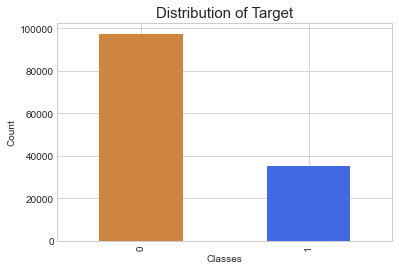

In [403]:
print(y.value_counts(normalize=True),'\n')
y.value_counts().plot.bar(color=['peru','royalblue'])
plt.title('Distribution of Target',size=15)
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [404]:
# We can smote the Train data to make classes equal

Xsm, ysm = SMOTE().fit_resample(X,y)

In [405]:
X.shape, y.shape, Xsm.shape, ysm.shape

((132440, 31), (132440,), (194872, 31), (194872,))

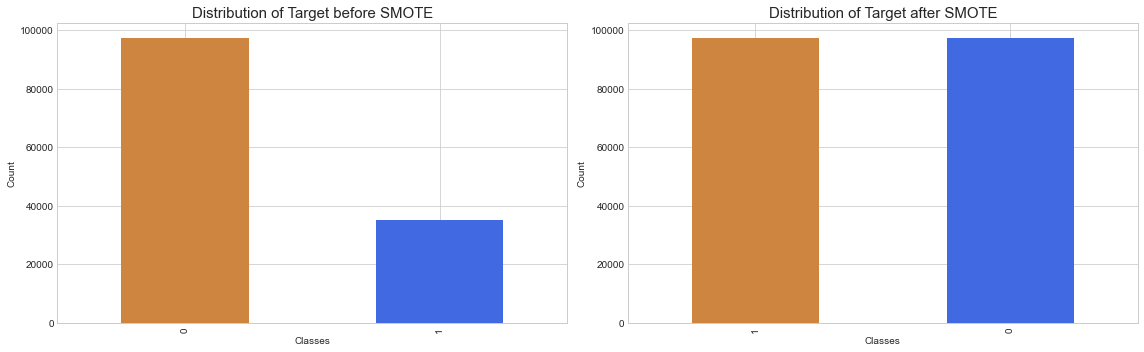

In [406]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
y.value_counts().plot.bar(color=['peru','royalblue'])
plt.title('Distribution of Target before SMOTE',size=15)
plt.xlabel('Classes')
plt.ylabel('Count')

plt.subplot(1,2,2)
ysm.value_counts().plot.bar(color=['peru','royalblue'])
plt.title('Distribution of Target after SMOTE',size=15)
plt.xlabel('Classes')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


<a id="models"></a>
<hr><b><h1 style='background-color:bisque;color:black; font-size:40px; font-family:cambria;text-align:center;'> Model Building</h1></b><hr/>

In [407]:
## Getting the Train Data F1-Score for Different Algorithms with Default Parameters

def create_models(seed=1):
    models = []
    models.append(('DecisionTree Classifier Entropy', DecisionTreeClassifier(criterion = 'entropy', random_state=seed)))
    models.append(('DecisionTree Classifier Gini',DecisionTreeClassifier(criterion = 'gini',random_state = seed)))
    models.append(('Naive Bayes Classifier',GaussianNB()))
    models.append(('Logistic Regression', LogisticRegression(random_state=seed)))
    models.append(('Random Forest', RandomForestClassifier(random_state=seed)))
    models.append(('AdaBoost Classifier', AdaBoostClassifier(random_state=seed)))
    models.append(('XGBoost Classifier', XGBClassifier()))
    return models

models = create_models()

results = []
names = []
for name, model in models:
    model.fit(Xsm, ysm)
    predictions = model.predict(Xsm)
    f1 = f1_score(ysm, predictions)
    results.append(f1)
    names.append(name)
    print('Classifier: {}, F1-score: {}'.format(name, f1))

Classifier: DecisionTree Classifier Entropy, F1-score: 1.0
Classifier: DecisionTree Classifier Gini, F1-score: 1.0
Classifier: Naive Bayes Classifier, F1-score: 0.6089834470074336
Classifier: Logistic Regression, F1-score: 0.5334215016203446
Classifier: Random Forest, F1-score: 1.0
Classifier: AdaBoost Classifier, F1-score: 0.7323337127988292
Classifier: XGBoost Classifier, F1-score: 0.7859118086696563


<h3> <b style='color:royalblue;font-size:20px;'> Models to Be Built </b>:
    <ul>
  <li><b style='font-size:14px;'>Logistic Regression</b></li><br>
  <li><b style='font-size:14px;'>Naive Bayes Classifier</b></li><br>
  <li><b style='font-size:14px;'>AdaBoost Classifier</b></li><br>
  <li><b style='font-size:14px;'>XGBoost Classifier</b></li><br>
    </ul>
</h3>

In [408]:
def print_score_train(true, pred):
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True)).T
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"F1 Score: {f1_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}")

In [409]:
solution = test_data.copy()
solution.set_index('ID',drop=True,inplace=True)

<h1 style="background-color:cornflowerblue; color:black; font-family:cambria;text-align:center;" >Model 1</h1><hr>

In [410]:
scores = cross_val_score(estimator = LogisticRegression(), X = Xsm,y = ysm,cv = 5,scoring = 'f1')
print('All scores: ', scores)
print("\nMinimum score obtained: ", round(min(scores), 4))
print("Maximum score obtained: ", round(max(scores), 4))
print("Average score obtained: ", round(np.mean(scores), 4)) 

All scores:  [0.51892276 0.52090619 0.53288142 0.54412281 0.53836858]

Minimum score obtained:  0.5189
Maximum score obtained:  0.5441
Average score obtained:  0.531


In [411]:
%%time
lr = LogisticRegression(random_state=1).fit(Xsm,ysm)
lr_train_preds = lr.predict(Xsm)
print(print_score_train(ysm,lr_train_preds))

Train Result:
Accuracy Score: 52.57%
_______________________________________________
F1 Score: 53.34%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score        support
0              0.526560  0.509083  0.517674   97436.000000
1              0.524853  0.542274  0.533422   97436.000000
accuracy       0.525678  0.525678  0.525678       0.525678
macro avg      0.525707  0.525678  0.525548  194872.000000
weighted avg   0.525707  0.525678  0.525548  194872.000000
_______________________________________________
Confusion Matrix: 
 [[49603 47833]
 [44599 52837]]
None
Wall time: 1.4 s


In [412]:
solution['LR_Preds'] = lr.predict(xtest)
solution[['LR_Preds']].to_csv('Hack.csv',header=['Default'])

<h1 style="background-color:cornflowerblue; color:black; font-family:cambria;text-align:center;" >Model 2</h1><hr>

In [413]:
scores = cross_val_score(estimator = GaussianNB(), X = Xsm,y = ysm,cv = 5,scoring = 'f1')
print('All scores: ', scores)
print("\nMinimum score obtained: ", round(min(scores), 4))
print("Maximum score obtained: ", round(max(scores), 4))
print("Average score obtained: ", round(np.mean(scores), 4)) 

All scores:  [0.49185061 0.53780104 0.65638291 0.6593361  0.65707258]

Minimum score obtained:  0.4919
Maximum score obtained:  0.6593
Average score obtained:  0.6005


In [414]:
%%time
nb = GaussianNB().fit(Xsm,ysm)
nb_train_preds = nb.predict(Xsm)
print(print_score_train(ysm,nb_train_preds))

Train Result:
Accuracy Score: 58.11%
_______________________________________________
F1 Score: 60.90%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score        support
0              0.594572  0.509678  0.548862   97436.000000
1              0.570940  0.652459  0.608983   97436.000000
accuracy       0.581069  0.581069  0.581069       0.581069
macro avg      0.582756  0.581069  0.578923  194872.000000
weighted avg   0.582756  0.581069  0.578923  194872.000000
_______________________________________________
Confusion Matrix: 
 [[49661 47775]
 [33863 63573]]
None
Wall time: 403 ms


In [415]:
solution['NB_Preds'] = nb.predict(xtest)
solution[['NB_Preds']].to_csv('Hack.csv',header=['Default'])

<h1 style="background-color:cornflowerblue; color:black; font-family:cambria;text-align:center;" >Model 3</h1><hr>

In [416]:
scores = cross_val_score(estimator = AdaBoostClassifier(random_state=1,n_estimators=45,learning_rate=1.4), X = Xsm,y = ysm,cv = 5,scoring = 'f1')
print('All scores: ', scores)
print("\nMinimum score obtained: ", round(min(scores), 4))
print("Maximum score obtained: ", round(max(scores), 4))
print("Average score obtained: ", round(np.mean(scores), 4)) 

All scores:  [0.         0.30422486 0.91690751 0.91464535 0.91310168]

Minimum score obtained:  0.0
Maximum score obtained:  0.9169
Average score obtained:  0.6098


In [417]:
# The cross_val_score for the first two iterations are different from the other three

In [418]:
%%time
ada = AdaBoostClassifier(random_state=1,n_estimators=45,learning_rate=1.4).fit(Xsm,ysm)
ada_train_preds = ada.predict(Xsm)
print(print_score_train(ysm,ada_train_preds))

Train Result:
Accuracy Score: 78.32%
_______________________________________________
F1 Score: 72.33%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score        support
0              0.697586  1.000000  0.821856   97436.000000
1              1.000000  0.566485  0.723256   97436.000000
accuracy       0.783242  0.783242  0.783242       0.783242
macro avg      0.848793  0.783242  0.772556  194872.000000
weighted avg   0.848793  0.783242  0.772556  194872.000000
_______________________________________________
Confusion Matrix: 
 [[97436     0]
 [42240 55196]]
None
Wall time: 12.4 s


In [419]:
solution['ADA_Preds'] = ada.predict(xtest)
solution[['ADA_Preds']].to_csv('Hack.csv',header=['Default'])

<h1 style="background-color:cornflowerblue; color:black; font-family:cambria;text-align:center;" >Model 4</h1><hr>

In [420]:
scores = cross_val_score(estimator = XGBClassifier(), X = Xsm,y = ysm,cv = 5,scoring = 'f1')
print('All scores: ', scores)
print("\nMinimum score obtained: ", round(min(scores), 4))
print("Maximum score obtained: ", round(max(scores), 4))
print("Average score obtained: ", round(np.mean(scores), 4)) 

All scores:  [0.00215098 0.33944603 0.99402085 0.99491036 0.9922346 ]

Minimum score obtained:  0.0022
Maximum score obtained:  0.9949
Average score obtained:  0.6646


In [421]:
%%time
xgb = XGBClassifier().fit(Xsm,ysm)
xgb_train_preds = xgb.predict(Xsm)
print(print_score_train(ysm,xgb_train_preds))

Train Result:
Accuracy Score: 82.36%
_______________________________________________
F1 Score: 78.59%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score        support
0              0.739328  0.999682  0.850016   97436.000000
1              0.999509  0.647533  0.785912   97436.000000
accuracy       0.823607  0.823607  0.823607       0.823607
macro avg      0.869419  0.823607  0.817964  194872.000000
weighted avg   0.869419  0.823607  0.817964  194872.000000
_______________________________________________
Confusion Matrix: 
 [[97405    31]
 [34343 63093]]
None
Wall time: 14.8 s


In [422]:
solution['XGB_Preds'] = xgb.predict(xtest)
solution[['XGB_Preds']].to_csv('Hack.csv',header=['Default'])

<h1 style="background-color:cornflowerblue; color:black; font-family:cambria;text-align:center;" >Model 4 HyperParameter Tuned</h1><hr>

In [423]:
%%time
xgb2 = XGBClassifier(max_depth=6,subsample=0.6).fit(Xsm,ysm)
xgb2_train_preds = xgb2.predict(Xsm)
print(print_score_train(ysm,xgb2_train_preds))

Train Result:
Accuracy Score: 82.45%
_______________________________________________
F1 Score: 78.78%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score       support
0              0.741093  0.997444  0.850369   97436.00000
1              0.996093  0.651535  0.787787   97436.00000
accuracy       0.824490  0.824490  0.824490       0.82449
macro avg      0.868593  0.824490  0.819078  194872.00000
weighted avg   0.868593  0.824490  0.819078  194872.00000
_______________________________________________
Confusion Matrix: 
 [[97187   249]
 [33953 63483]]
None
Wall time: 15.7 s


In [424]:
solution['XGB2_Preds'] = xgb2.predict(xtest)
solution[['XGB2_Preds']].to_csv('Hack.csv',header=['Default'])

In [425]:
solution.columns

Index(['Compensation', 'Vehicle_Status', 'Loan_amt', 'Annuity_amt',
       'density_Ind', 'Job_Type', 'Default_hist', 'Prop_List',
       'Home_Appliances', 'Region_Type', 'Credit_Inq', 'Education_det',
       'Marital_Stat', 'Gen', 'Credit_Lnks', 'Experience', 'Income_Alt',
       'Day_Process', 'Ph.No', 'Type_Loan', 'Dependents', 'Company_Rating',
       'Region', 'Age', 'hour_Process', 'Addr_permanent', 'Permanent_Addr_tag',
       'c1_rated', 'c2_rated', 'Contact_age', 'Product_bought', 'LR_Preds',
       'NB_Preds', 'ADA_Preds', 'XGB_Preds', 'XGB2_Preds'],
      dtype='object')

In [426]:
solution.loc[:,['LR_Preds','NB_Preds', 'ADA_Preds', 'XGB_Preds', 'XGB2_Preds']].head()

,LR_Preds,NB_Preds,ADA_Preds,XGB_Preds,XGB2_Preds
ID,,,,,
487410,1,0,1,1,1
533258,1,0,1,1,1
581926,1,1,1,1,1
486301,1,1,1,1,1
580822,0,0,1,1,1


<a id="sol"></a>
<hr><b><h1 style='background-color:bisque;color:black; font-size:40px; font-family:Cambria;text-align:center;'> Descriptive Section</h1></b></hr>

<h1 style="background-color:lightskyblue; color:black; font-size:20px; font-family:cambria;" >Q) Once you have a mechanism to estimate the “level of default”, please describe how the financial institution must use that mechanism to decide whether to approve or decline the prospect for the loan they are applying for.     
(This is an open-ended question and you are free to come up with a detailed explanation basis the analysis, model building exercise you have carried out)</h1>

<p style="background-color:aliceblue;font-size:16px;"> This project is a typical binary classification problem, which leverages the loan and personal information to predict whether the customer will default the loan. The goal is to use the model as a tool to help make decisions on issuing the loans. Four Classifiers are built using Logistic Regression, Naive Bayes Classifier, AdaBoost Classifier and XGBoost Classifier. XGBoost Classifier Hypertuned model is selected as the final model and had the highest score for me.</p>
<p style="background-color:aliceblue;font-size:16px;">   
We need to calculate the amount of Profit the financial institution makes with and without the model. We can adjust the strictness of the model using thresholds. With low thresholds, numerous loans will be provided and with higher thresholds, the model becomes strict in providing loans.
</p>
<p style="background-color:aliceblue;font-size:16px">   
The next steps in the project are to deploy the model and monitor its performance when newer records are observed. Adjustments will be needed either seasonally or anytime the performance drops below the baseline standards to accommodate for the changes brought by the external factors. The frequency of model maintenance for this application does not to be high given the amount of transactions intake, but if the model needs to be used in an accurate and timely fashion, it is not difficult to transform this project into an online learning pipeline that can ensure the model to be always up to date.</p>